In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_94a137416d5148a598130aa554926487 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_94a137416d5148a598130aa554926487 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_94a137416d5148a598130aa554926487 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='********',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_94a137416d5148a598130aa554926487)

body = client_94a137416d5148a598130aa554926487.get_object(Bucket='cryptotrendanalysis-donotdelete-pr-kjkuf9adconkib',Key='Crypto data - 0329.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,name,date,rank,rank_7d,delta_1d,delta_7d,delta_14d,delta_30d,future_1d,future_7d,...,future_volume_3_absolute,future_volume_7_absolute,future_volume_14_absolute,price,past_price_3,past_price_7,past_price_14,future_price_3,future_price_7,future_price_14
0,bitcoin,2021-02-15 0:00:00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.074036e+10,3.484896e+09,1.941212e+09,48607.87452,0.983708,0.798910,0.680235,1.072741,1.186419,0.925162
1,bitcoin,2021-02-16 0:00:00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.575347e+09,4.047017e+10,2.156713e+09,47898.48703,0.989889,0.966786,0.697433,1.080057,1.135962,1.039435
2,bitcoin,2021-02-17 0:00:00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,7.256102e+09,5.254847e+10,-1.064160e+10,49238.13691,0.953352,0.945803,0.720701,1.138116,0.988906,0.985664
3,bitcoin,2021-02-18 0:00:00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,8.873049e+09,4.661846e+09,-9.266471e+09,52143.67884,0.932191,0.860098,0.719065,1.081198,0.956000,0.969963
4,bitcoin,2021-02-19 0:00:00,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,2.736764e+09,1.868873e+09,2.263079e+09,51733.07554,0.925877,0.924282,0.711663,1.114747,0.908368,0.941901


In [179]:
df.columns

Index(['name', 'date', 'rank', 'rank_7d', 'delta_1d', 'delta_7d', 'delta_14d',
       'delta_30d', 'future_1d', 'future_7d', 'future_14d', 'future_30d',
       'name.1', 'date.1', 'cap', 'past_cap_3_relative', 'past_cap_7_relative',
       'past_cap_14_relative', 'future_cap_3_relative',
       'future_cap_7_relative', 'future_cap_14_relative',
       'past_cap_3_absolute', 'past_cap_7_absolute', 'past_cap_14_absolute',
       'future_cap_3_absolute', 'future_cap_7_absolute',
       'future_cap_14_absolute', 'volume', 'past_volume_3_relative',
       'past_volume_7_relative', 'past_volume_14_relative',
       'future_volume_3_relative', 'future_volume_7_relative',
       'future_volume_14_relative', 'past_volume_3_absolute',
       'past_volume_7_absolute', 'past_volume_14_absolute',
       'future_volume_3_absolute', 'future_volume_7_absolute',
       'future_volume_14_absolute', 'price', 'past_price_3', 'past_price_7',
       'past_price_14', 'future_price_3', 'future_price_7', 'futu

In [10]:
df.describe()

,rank,rank_7d,delta_1d,delta_7d,delta_14d,delta_30d,future_1d,future_7d,future_14d,future_30d,...,future_volume_3_absolute,future_volume_7_absolute,future_volume_14_absolute,price,past_price_3,past_price_7,past_price_14,future_price_3,future_price_7,future_price_14
count,33180.000000,33180.000000,33112.000000,32790.000000,32412.000000,31522.000000,32363.000000,27575.000000,22077.000000,9765.000000,...,3.003500e+04,2.693100e+04,2.155100e+04,32379.000000,32296.000000,32296.000000,32296.000000,29958.000000,26862.000000,21496.000000
mean,409.003255,412.071911,0.516852,3.390851,5.983370,9.467705,0.510490,3.100054,5.660597,11.897593,...,-7.307641e+06,-1.675322e+07,-5.324539e+07,823.896642,1.001374,1.715172,0.874439,2.026731,2.425857,2.769595
std,274.692864,276.809197,8.462419,49.313899,83.150388,135.042527,8.564679,48.073461,80.134441,129.088040,...,1.190028e+09,1.468163e+09,1.377788e+09,6371.619717,1.202870,61.644876,0.649824,69.392525,86.612103,85.510960
min,1.000000,1.000000,-156.000000,-556.000000,-514.000000,-817.000000,-156.000000,-556.000000,-514.000000,-492.000000,...,-6.726985e+10,-9.922950e+10,-9.389426e+10,0.000000,0.000164,0.000155,0.000161,0.000177,0.000175,0.015017
25%,193.000000,194.000000,-3.000000,-19.000000,-33.000000,-55.000000,-3.000000,-19.000000,-33.000000,-53.000000,...,-1.816600e+06,-2.167854e+06,-2.453388e+06,0.106505,0.892634,0.791548,0.619941,0.934316,0.907551,0.920660
50%,387.000000,385.000000,0.000000,-2.000000,-4.000000,-5.000000,0.000000,-2.000000,-4.000000,-4.000000,...,-2.287601e+04,-2.932234e+04,-1.411079e+04,0.784880,0.988897,0.957388,0.862603,1.011364,1.023723,1.099187
75%,588.000000,588.000000,2.000000,15.000000,27.000000,48.000000,2.000000,15.000000,27.000000,53.000000,...,1.130469e+06,1.342955e+06,1.710143e+06,6.783330,1.070809,1.085875,1.062348,1.119195,1.217050,1.458168
max,2354.000000,2348.000000,228.000000,1012.000000,1417.000000,1365.000000,228.000000,1012.000000,1417.000000,1365.000000,...,5.822624e+10,9.261113e+10,1.797205e+10,99999.999990,104.709476,5716.119318,66.590307,6107.034091,6457.937500,6210.104938


In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Let's pick some features and predict the future_price_7.

In [196]:
# dropping top 10 coins from the data frame
df_n = df.drop(df.loc[df["rank"] <= 10].index)

# resetting index
df_n.reset_index(drop=True, inplace=True)
df_n

,name,date,rank,rank_7d,delta_1d,delta_7d,delta_14d,delta_30d,future_1d,future_7d,...,future_volume_3_absolute,future_volume_7_absolute,future_volume_14_absolute,price,past_price_3,past_price_7,past_price_14,future_price_3,future_price_7,future_price_14
0,uniswap,2021-02-15 0:00:00,14,15,0.0,0.0,2.0,16.0,0.0,1.0,...,1.069836e+08,1.947333e+09,2.526310e+08,20.95109,1.024923,0.886963,0.841903,1.024757,1.384005,1.057654
1,uniswap,2021-02-16 0:00:00,15,15,0.0,0.0,2.0,15.0,0.0,1.0,...,-4.411520e+08,1.338814e+09,-3.268932e+08,19.98675,1.135866,0.968557,1.018618,1.060555,1.389136,1.280483
2,uniswap,2021-02-17 0:00:00,15,15,0.0,0.0,1.0,14.0,0.0,1.0,...,6.972521e+07,2.212571e+09,4.459668e+08,20.43306,1.065530,0.955018,0.933402,0.986917,1.207923,1.256487
3,uniswap,2021-02-18 0:00:00,14,15,0.0,0.0,1.0,14.0,0.0,1.0,...,3.780315e+09,9.765582e+08,-1.770219e+07,21.46977,0.975841,0.959776,0.923483,1.348409,1.181623,1.187094
4,uniswap,2021-02-19 0:00:00,15,15,0.0,0.0,0.0,14.0,0.0,2.0,...,1.890129e+09,5.745744e+08,1.128942e+09,21.19704,0.942903,1.013031,0.945712,1.367947,1.097016,1.338310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32745,verox,2021-03-25 0:00:00,664,681,3.0,16.0,139.0,149.0,2.0,NaN,...,-1.540247e+06,NaN,NaN,1078.00688,0.982516,1.060734,0.504864,0.987276,NaN,NaN
32746,verox,2021-03-26 0:00:00,662,679,2.0,17.0,125.0,150.0,1.0,NaN,...,1.086466e+06,NaN,NaN,1031.48487,0.970859,0.970766,0.730207,0.814315,NaN,NaN
32747,verox,2021-03-27 0:00:00,676,678,1.0,15.0,105.0,152.0,-1.0,NaN,...,NaN,NaN,NaN,1055.24675,1.004703,1.015089,0.865950,NaN,NaN,NaN
32748,verox,2021-03-28 0:00:00,686,679,-1.0,11.0,79.0,153.0,-9.0,NaN,...,NaN,NaN,NaN,1064.29061,1.012888,1.070079,1.080446,NaN,NaN,NaN


In [170]:
df_a = df[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]]

df_a.describe()

#dropping rows containing NULL value
df_a2 = df_a.dropna()

In [222]:
df_a2.describe()

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
0,1.146329,0.931834,0.735882,0.983708,0.798910,0.680235,1.186419
1,1.014417,1.424690,0.806868,0.989889,0.966786,0.697433,1.135962
2,0.862354,1.228984,0.790923,0.953352,0.945803,0.720701,0.988906
3,0.843158,1.022220,0.726680,0.932191,0.860098,0.719065,0.956000
4,1.044033,1.131666,0.931750,0.925877,0.924282,0.711663,0.908368
...,...,...,...,...,...,...,...
33168,1.270072,0.547279,0.371974,1.180731,0.475958,0.357452,0.942744
33169,1.699999,1.300040,0.626196,1.230517,0.752197,0.377637,1.030115
33170,0.942980,1.322447,0.467760,0.896723,0.853077,0.343472,0.985135
33171,1.569947,1.747321,0.661825,1.004042,1.009688,0.344291,0.934510


<h3>No need to standardize input, they are already all relative</h3>

In [103]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#pd.options.mode.chained_assignment = None  # default='warn' disabling SettingWithCopyWarning
#df_a2[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]] = scaler.fit_transform(df_a2[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14"]])

In [73]:
df_a2.describe()

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
count,2.680100e+04,2.680100e+04,2.680100e+04,26801.000000,26801.000000,26801.000000,26801.000000
mean,3.974382e-05,3.736738e-05,3.760237e-05,0.012213,0.000252,0.013044,1.611384
std,6.117306e-03,6.108360e-03,6.108375e-03,0.013543,0.007203,0.010391,54.321546
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000175
25%,4.947389e-08,2.503297e-09,1.627401e-08,0.010930,0.000158,0.009107,0.907528
50%,7.599072e-08,4.315715e-09,3.247108e-08,0.012111,0.000192,0.012739,1.023628
75%,1.126400e-07,6.921493e-09,5.846271e-08,0.013084,0.000218,0.015878,1.217160
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,6306.287293


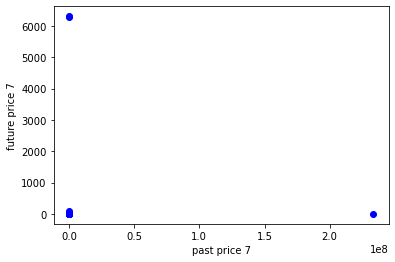

In [175]:
plt.scatter(df_a2.past_volume_7_relative, df_a2.future_price_7,  color='blue')
plt.xlabel("past price 7")
plt.ylabel("future price 7")
plt.show() #chart doesnt' tell anything

In [119]:
#dx = df_a2.drop(df_a2.loc[df_a2["past_volume_7_relative"] > .00006].index)
#dx.drop(dx.loc[dx["future_price_7"] > 5].index, inplace=True)


Create train and test dataset

In [172]:
#msk = np.random.rand(len(df_a2)) < 0.8
#train = df_a2[msk]
#test = df_a2[~msk]

msk = np.random.rand(len(df_a2)) < 0.8
train = df_a2[msk]
test = df_a2[~msk]

True

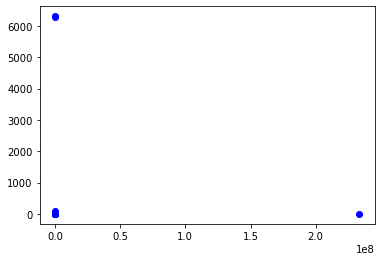

In [166]:
plt.scatter(train.past_volume_7_relative, train.future_price_7, color="blue")
test.isnull().values.any()

<h3>Multiple Regression Model</h3>

In [173]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14"]])
y = np.asanyarray(train["future_price_7"])

regr.fit(x, y)
print ("Coefficients: ", regr.coef_)

Coefficients:  [ 3.11906613e-06 -1.13759912e-05 -6.74139138e-06  4.55732252e-01
  1.27126853e+00 -5.29745669e-01]


<h3>Prediction</h3>

In [174]:
y_hat = regr.predict(test[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14"]])
x = np.asanyarray(test[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14"]])
y = np.asanyarray(test["future_price_7"])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2560.23
Variance score: 0.66


In [151]:
test.describe()

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
count,5.304000e+03,5.304000e+03,5.304000e+03,5304.000000,5.304000e+03,5.304000e+03,5304.000000
mean,1.458770e-07,9.418702e-09,1.031578e-07,0.012170,1.910278e-04,1.326366e-02,1.117744
std,1.241016e-06,9.947654e-08,2.250194e-06,0.012967,5.924524e-05,1.518253e-02,0.406669
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.190671e-09,1.816935e-07,0.000188
25%,4.954795e-08,2.543385e-09,1.651542e-08,0.010896,1.570644e-04,9.057937e-03,0.904924
50%,7.558844e-08,4.338715e-09,3.278303e-08,0.012103,1.916264e-04,1.277790e-02,1.020940
75%,1.136090e-07,6.837936e-09,5.962002e-08,0.013055,2.178967e-04,1.599294e-02,1.209442
max,6.702738e-05,6.858256e-06,1.611580e-04,0.940301,8.343779e-04,1.000000e+00,4.828241


In [152]:
train.describe()

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
count,2.142700e+04,2.142700e+04,2.142700e+04,2.142700e+04,21427.000000,21427.000000,21427.000000
mean,3.930320e-07,1.710345e-08,1.968877e-07,1.210889e-02,0.000191,0.012993,1.125094
std,1.403841e-05,4.023875e-07,8.467374e-06,9.337881e-03,0.000058,0.008825,0.415864
min,0.000000e+00,0.000000e+00,0.000000e+00,3.741909e-07,0.000000,0.000000,0.000175
25%,4.947994e-08,2.492533e-09,1.627279e-08,1.094119e-02,0.000158,0.009125,0.907526
50%,7.608122e-08,4.311602e-09,3.242388e-08,1.211603e-02,0.000192,0.012732,1.023622
75%,1.124412e-07,6.943334e-09,5.805515e-08,1.309261e-02,0.000218,0.015859,1.216483
max,1.402379e-03,3.231974e-05,8.786160e-04,9.530896e-01,0.000804,1.000000,4.998281


<h3>We'll now run the same regression, but without the top 10 coins</h3>

In [246]:
from sklearn.model_selection import train_test_split

df_a = df_n[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]]
df_a2 = df_a.dropna()

x = df_a2.drop('future_price_7', axis=1)
y = df_a2.future_price_7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)
print ("Coefficients: ", regr.coef_)

y_hat = regr.predict(x_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients:  [-1.50368104e-06 -3.29699531e-06  2.79232245e-05  4.47644912e+00
  1.42892842e+00 -4.10009560e+00]
Residual sum of squares: 18.32
Variance score: -11.41


In [242]:
# Funtion to get average rss and r2 for multiple random_state
def get_score(df):
    df = df.dropna()
    
    x = df.drop("future_price_7", axis=1)
    y = df.future_price_7
    
    rss = []
    r2 = []
    
    for i in range(1, 101):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = i)
        
        regr.fit(x_train, y_train)
        
        y_hat = regr.predict(x_test)
        
        #residual sum of square 
        rss.append(np.mean((y_hat - y_test) ** 2))
        
        #explained variance score
        r2.append(regr.score(x_test, y_test))
    
    rss_mean = np.mean(rss)
    r2_mean = np.mean(r2)
    
    print("rss_mean: ", rss_mean)
    print("r2_mean: ", r2_mean)
    
    return rss, r2
        
    

In [250]:
df_a = df[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]]
df_b = df_n[["past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]]

print("With Top 10:")
u, v = get_score(df_a)
print("Without Top 10:")
q, p = get_score(df_b)

With Top 10:
rss_mean:  4813.786916662497
r2_mean:  -8528.847093653481
Without Top 10:
rss_mean:  11705.453638158175
r2_mean:  -15166.567661388663


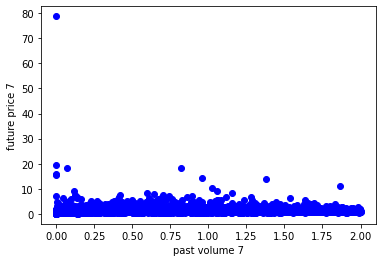

In [278]:
df_a2 = df_a.dropna()

# dropping all the rows with past_volume_7_relative greater than 2, outlier cutoff
dx = df_a2.drop(df_a2.loc[df_a2["past_volume_7_relative"] > 2].index)

plt.scatter(dx.past_volume_7_relative, dx.future_price_7,  color='blue')
plt.xlabel("past volume 7")
plt.ylabel("future price 7")
plt.show() 

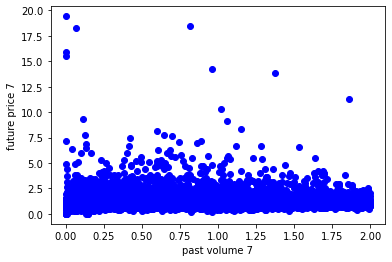

In [286]:
# dropping off all the rows with future_price_7 more than 50
dx.drop(dx.loc[dx["future_price_7"] > 50].index, inplace=True)

plt.scatter(dx.past_volume_7_relative, dx.future_price_7,  color='blue')
plt.xlabel("past volume 7")
plt.ylabel("future price 7")
plt.show() 

In [287]:
b, d = get_score(dx)

rss_mean:  0.3192191014252249
r2_mean:  -0.033105250426805705


In [272]:
df_a2.describe()

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
count,2.680100e+04,2.680100e+04,2.680100e+04,26801.000000,26801.000000,26801.000000,26801.000000
mean,5.417239e+02,8.721451e+03,1.064154e+03,0.993679,1.236050,0.868773,1.611384
std,8.338129e+04,1.425675e+06,1.728682e+05,1.101653,35.373761,0.691914,54.321546
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000164,0.000155,0.000161,0.000175
25%,6.743486e-01,5.842631e-01,4.605576e-01,0.889306,0.775807,0.606630,0.907528
50%,1.035783e+00,1.007277e+00,9.189376e-01,0.985359,0.941035,0.848485,1.023628
75%,1.535328e+00,1.615459e+00,1.654506e+00,1.064458,1.071517,1.057493,1.217160
max,1.363039e+07,2.333974e+08,2.830019e+07,81.346344,4910.824176,66.590307,6306.287293


In [275]:
df_t = df[["name", "past_volume_3_relative", "past_volume_7_relative", "past_volume_14_relative", "past_price_3", "past_price_7", "past_price_14", "future_price_7"]]
df_t2 = df_t.dropna()
df_t.nlargest(30, "future_price_7")

,name,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
22235,eterbase,NaN,NaN,NaN,1.028409,5716.119318,0.920455,6457.937500
22231,eterbase,2.879599,10.190381,0.000000,63.690608,3071.464088,0.895028,6306.287293
22232,eterbase,0.053494,5.942894,0.000000,63.203297,4910.824176,0.890110,6271.637363
22220,eterbase,NaN,NaN,NaN,1.000000,1.000000,1.000000,6210.104938
22218,eterbase,NaN,NaN,NaN,1.000000,1.000000,1.000000,5517.098765
22217,eterbase,NaN,NaN,NaN,1.000000,1.000000,1.000000,3431.697531
22233,eterbase,NaN,NaN,NaN,1.011364,5316.630682,0.920455,79.840909
22234,eterbase,NaN,NaN,NaN,1.011364,5316.630682,0.920455,79.840909
22229,eterbase,101.871868,0.000000,0.000000,81.346344,0.014083,0.014083,78.792576
22221,eterbase,NaN,NaN,NaN,1.000000,1.000000,1.000000,71.160494


<h1> What the heck is Eterbase </h2>

In [276]:
df_t2.nlargest(30, "past_volume_7_relative")

,name,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
1839,compound-usd-coin,1.363039e+07,2.333974e+08,2.830019e+07,0.992252,0.993619,0.991340,0.993619
1581,compound-ether,7.377349e+05,2.012063e+05,4.563547e+04,1.047732,1.027965,0.892579,0.985583
6137,compound-usdt,1.608401e+03,3.285074e+04,7.491981e+02,1.009113,1.003837,1.005276,1.005755
23315,cream-eth2,2.342785e+04,1.485504e+04,3.871534e+04,1.013906,0.807283,0.741181,0.980220
10512,compound-0x,7.848491e+02,7.543344e+03,6.144678e+02,0.978343,1.026813,0.958749,1.058096
11739,refereum,8.620279e+03,7.127276e+03,4.139957e+00,1.288136,1.835351,1.029056,1.704600
32468,coinpoker,1.549084e+01,4.218963e+03,6.268895e+02,1.031106,1.071429,1.062212,0.903226
11044,beefy-finance,2.706386e+03,3.991069e+03,1.333868e+03,1.401043,1.107625,0.626017,0.989360
32488,coinpoker,1.228501e+03,3.452326e+03,2.232108e+01,0.890041,0.924274,0.800830,0.693983
28277,dynamic,3.372120e+03,2.818942e+03,2.941605e+03,1.204187,1.180735,1.260593,1.529764


In [277]:
df_t2.nlargest(30, "future_price_7")

,name,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
22231,eterbase,2.879599,10.190381,0.000000,63.690608,3071.464088,0.895028,6306.287293
22232,eterbase,0.053494,5.942894,0.000000,63.203297,4910.824176,0.890110,6271.637363
22229,eterbase,101.871868,0.000000,0.000000,81.346344,0.014083,0.014083,78.792576
31087,jupiter,32.103434,0.000602,13.513412,0.975000,0.537500,0.837500,19.425000
32277,erc20,1.276001,0.818774,0.758858,1.168317,0.772277,1.000000,18.495050
31086,jupiter,0.279621,0.069649,0.015436,0.987654,0.864198,0.814815,18.259259
31089,jupiter,2.349188,0.001974,0.015731,1.000000,0.555556,0.864198,15.876543
31088,jupiter,36.276085,0.000177,49.617146,1.038462,1.782051,0.820513,15.538462
32276,erc20,0.768874,0.957471,0.651249,0.805556,0.814815,0.814815,14.268519
14943,pibble,0.191822,1.375969,3.027881,0.812500,0.875000,1.125000,13.875000


In [279]:
dx.

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
count,22115.000000,22115.000000,22115.000000,22115.000000,22115.000000,22115.000000,22115.000000
mean,1.328263,0.886659,1.533563,0.976681,0.897784,0.854519,1.143617
std,9.824926,0.488578,20.555754,1.053211,0.263199,0.737563,0.769253
min,0.000000,0.000000,0.000000,0.000164,0.000155,0.000161,0.000175
25%,0.616908,0.501046,0.419086,0.871378,0.743680,0.597979,0.903021
50%,0.962581,0.863603,0.832997,0.975709,0.908191,0.834222,1.021127
75%,1.369518,1.232118,1.436437,1.053561,1.033262,1.038224,1.218013
max,1406.132320,1.999986,2905.229488,81.346344,3.791198,66.590307,78.792576


In [284]:
dx.nlargest(10, 'future_price_7')

,past_volume_3_relative,past_volume_7_relative,past_volume_14_relative,past_price_3,past_price_7,past_price_14,future_price_7
22229,101.871868,0.000000,0.000000,81.346344,0.014083,0.014083,78.792576
31087,32.103434,0.000602,13.513412,0.975000,0.537500,0.837500,19.425000
32277,1.276001,0.818774,0.758858,1.168317,0.772277,1.000000,18.495050
31086,0.279621,0.069649,0.015436,0.987654,0.864198,0.814815,18.259259
31089,2.349188,0.001974,0.015731,1.000000,0.555556,0.864198,15.876543
31088,36.276085,0.000177,49.617146,1.038462,1.782051,0.820513,15.538462
32276,0.768874,0.957471,0.651249,0.805556,0.814815,0.814815,14.268519
14943,0.191822,1.375969,3.027881,0.812500,0.875000,1.125000,13.875000
31090,0.039564,1.863441,0.001655,0.930233,0.930233,1.744186,11.279070
32275,1.264926,1.022848,0.897173,1.085106,0.957447,1.191489,10.340426
